# Descriptive analyis: First Week

In [31]:
%matplotlib inline
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code"></form>''')

In [32]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from gensim.corpora.dictionary import Dictionary
from gensim import corpora, models, similarities
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import re
from collections import Counter
import numpy as np

In [33]:
# read data
rec = pd.read_csv('data/clean_register.csv')

b_file = '/Users/sdaza/Dropbox/Projects/Proy Reinserción -Base datos/BASE DE DATOS/01LINEA DE BASE/170630 Base Reinserción Línea Base.csv'
fw_file = '/Users/sdaza/Dropbox/Projects/Proy Reinserción -Base datos/BASE DE DATOS/02PRIMERA SEMANA/170825- Base Reinserción Primera Semana.csv'

# base line
b = pd.read_csv(b_file)
b.columns = map(str.lower, b.columns)
b = b.rename(columns = {'folio_2' : 'id'})

# fist week
fw = pd.read_csv(fw_file)
fw.columns = map(str.lower, fw.columns)
fw = fw.rename(columns = {'folio2' : 'id'})

b = b.loc[b.id.isin(rec.id),:]
fw = fw.loc[fw.id.isin(rec.id),:]

# Text: The best of being outside

In [34]:
fw['best'] = (fw.p1_1.astype(str) + ' ' + fw.p1_2.astype(str) + ' ' +
              fw.p1_3.astype(str) + ' ' + fw.p1_4.astype(str) + ' ' + fw.p1_5.astype(str))

In [35]:
text = fw.best.str.cat(sep = ' ').lower()
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'nan', '', text)

In [36]:
stop = stopwords.words('spanish')

In [37]:
stop.extend(['sido', 'pude', 'mas', 'poder'])

In [38]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

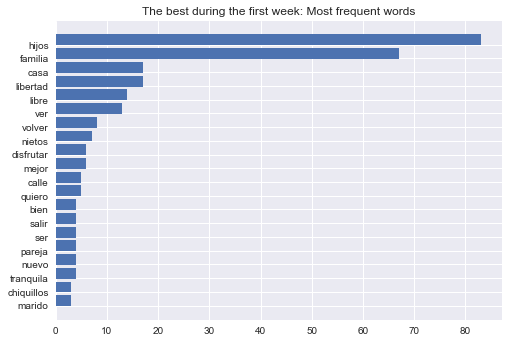

In [39]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('The best during the first week: Most frequent words');

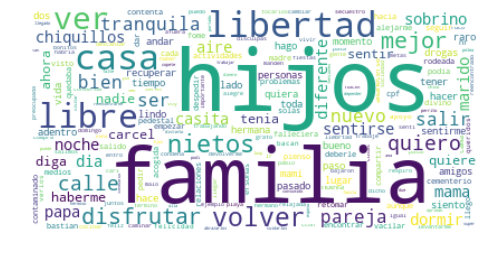

In [40]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

# Text: The most difficult of being outside



In [41]:
fw['difficult'] = (fw.p2_1.astype(str) + ' ' + fw.p2_2.astype(str) + ' ' +
              fw.p2_3.astype(str) + ' ' + fw.p2_4.astype(str) + ' ' + fw.p2_5.astype(str))

In [42]:
text = fw.difficult.str.cat(sep = ' ').lower()
text = re.sub(r'hija\b|hijas\b|hijo\b', 'hijos', text)
text = re.sub(r'droga\b', 'drogas', text)
text = re.sub(r'nan', '', text)

In [43]:
stop = stopwords.words('spanish')
stop.extend(['sido', 'pude', 'mas', 'poder'])

In [44]:
tokens  = [w for w in word_tokenize(text.lower()) if w.isalpha()]
no_stops = [t for t in tokens if t not in stop]
dictionary = Dictionary([no_stops])

counter = Counter(no_stops)

words = counter.keys()
counts = counter.values()

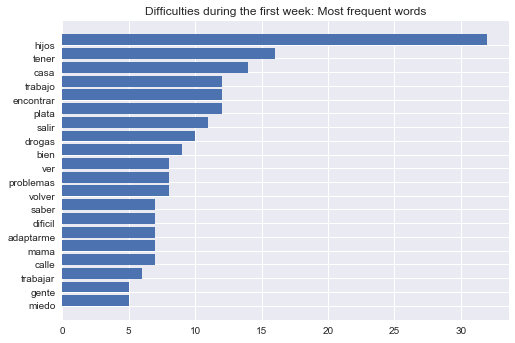

In [45]:
# frequency plot
labels, values = zip(*counter.items())
indSort = np.argsort(values)[::-1]

# rearrange your data
labels = np.array(labels)[indSort][0:20]
values = np.array(values)[indSort][0:20]

indexes = np.arange(len(labels))
bar_width = 0.35
plt.barh(indexes, values);
plt.yticks(indexes + bar_width, labels)
plt.gca().invert_yaxis()
plt.title('Difficulties during the first week: Most frequent words');

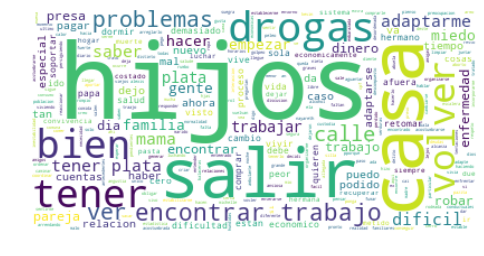

In [46]:
wordcloud = WordCloud().generate(text.lower())

wc = WordCloud(background_color = 'white', max_words = 500, stopwords = stop).generate(text.lower())

plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

# Time/Day of release


In [47]:
#df.p8_hora.value_counts()
#df.p8_hora.isnull().value_counts()

In [48]:
# formatting date of release
fw['day'] = fw.p7_dia.astype(str)
fw['month'] = fw.p7_mes.astype(str)
fw['year'] = fw.p7_anio.astype(str)

fw['day'] = fw.day.replace('-99', None)
fw['month'] = fw.month.replace('-99', None)
fw['year'] = fw.year.replace(['-9999','9999'], None)

In [49]:
fw['release']  = pd.to_datetime(fw.month+'/'+fw.day+'/'+fw.year+' '+fw.p8_hora, errors = 'coerce')

In [50]:
fw = fw.set_index(['release'])

In [51]:
# plot hour of release
fw = fw.loc[fw.p11!=-9,:]

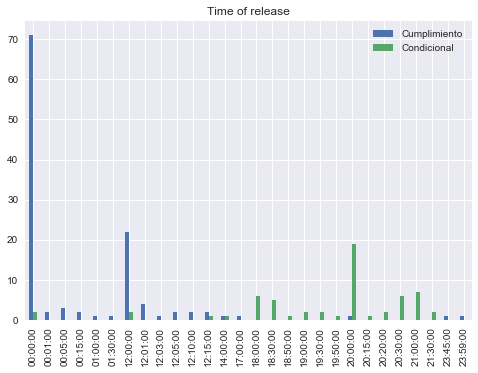

In [52]:
t = fw.groupby([fw.index.time, 'p11']).id.count()
t = t.unstack()
t.columns = ['Cumplimiento', 'Condicional']
t.plot(kind='bar')
plt.title('Time of release')
plt.xticks(rotation = 90);


In [53]:
# plot week day 
t = fw.groupby([fw.index.dayofweek, 'p11']).id.count()
t = t.unstack()
t.columns = ['Cumplimiento', 'Condicional']

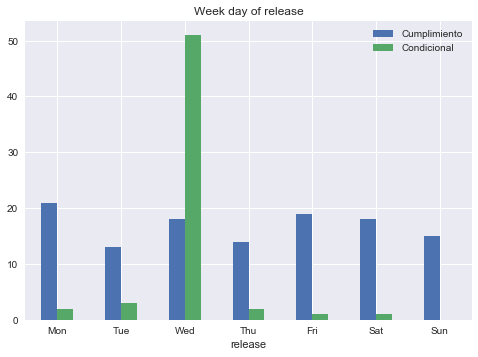

In [54]:
wdays = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
t.plot(kind='bar')
plt.xticks(fw.groupby(fw.index.dayofweek).id.count().index, wdays, rotation = 0)
plt.title('Week day of release');

# Mental Health

In [55]:
# select variables
fb  = b.filter(regex='^id|salud_mental')
ffw  = fw.filter(regex='^id|salud_mental')

fb = fb.set_index('id')
ffw = ffw.set_index('id')

In [56]:
# remove all residual codes
sm = b.filter(regex='salud_mental').columns

In [57]:
fb  = fb.loc[:,sm].replace(9, np.nan)
ffw = ffw.loc[:,sm].replace(-9, np.nan)

In [58]:
fb['score_b'] = fb.loc[:,sm].mean(axis=1)
ffw['score_fw'] = ffw.loc[:,sm].mean(axis=1)

In [59]:
tot = ffw.merge(fb, how='inner', left_index=True, right_index=True)

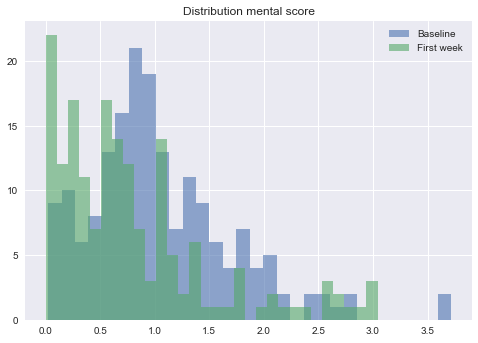

In [60]:
tot['score_b'].hist(bins =30, alpha = 0.6)
tot['score_fw'].hist(bins =30, alpha = 0.6)
plt.legend(['Baseline', 'First week'])
plt.title('Distribution mental score');